In [2]:
import pygad
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

In [10]:
matriz = [
    [5,2,4,8,9,0,3,3,8,7],
    [5,5,3,4,4,6,4,1,9,1],
    [4,1,2,1,3,8,7,8,9,1],
    [1,7,1,6,9,3,1,9,6,9],
    [4,7,4,9,9,8,6,5,4,2],
    [7,5,8,2,5,2,3,9,8,2],
    [1,4,0,6,8,4,0,1,2,1],
    [1,5,2,1,2,8,3,3,6,2],
    [4,5,9,6,3,9,7,6,5,10],
    [0,6,2,8,7,1,2,1,5,3]
]

In [3]:
#Funcion de 
def binatodeci(binary):
    return sum(val*(2**idx) for idx, val in enumerate(reversed(binary)))

In [4]:
def fitness_func(solution, solution_idx):
    # output = numpy.sum(solution*function_inputs)
    # fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    # return fitness
    fitness = 0
    num = binatodeci(solution)
    xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
    yfs = ((num%16)/16)*10
    for i in range(0,10):
        for j in range(0,10):

            fitness+= math.sqrt((i-xfs)**2  + (j-yfs)**2)*matriz[i][j]
        
    return 1/fitness

In [5]:
#Parametros del modelo
num_generations = 20    # Number of generations.
num_parents_mating = 2  # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 4        # Number of solutions in the population.
num_genes = 8
last_fitness = 0
mutation_probability=0.20

In [6]:
#Print en cada generacion
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    print("x Best Solution: " +str(binatodeci(ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[0])))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

In [12]:
#Definicion del modelo:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation,
                       mutation_by_replacement=True,
                       init_range_low=0,
                       init_range_high=2,
                       gene_type=int,
                       mutation_probability=mutation_probability          
)

Generation = 1
Fitness    = 0.0005817914333187427
Change     = 2.174962766722272e-05
x Best Solution: 87
Generation = 2
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 3
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 4
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 5
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 6
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 7
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 8
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 9
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 10
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 11
Fitness    = 0.0005817914333187427
Change     = 0.0
x Best Solution: 87
Generation = 12
Fitness

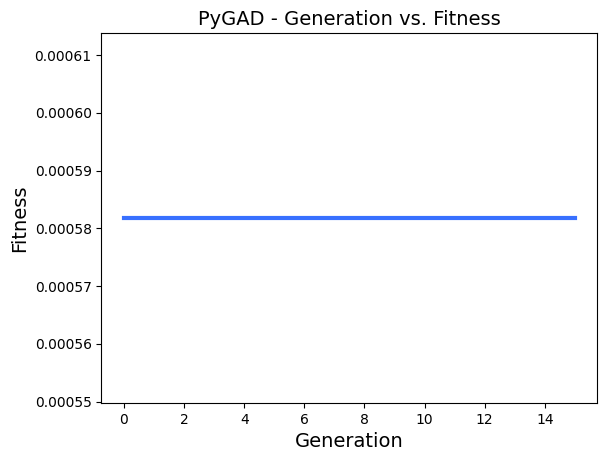

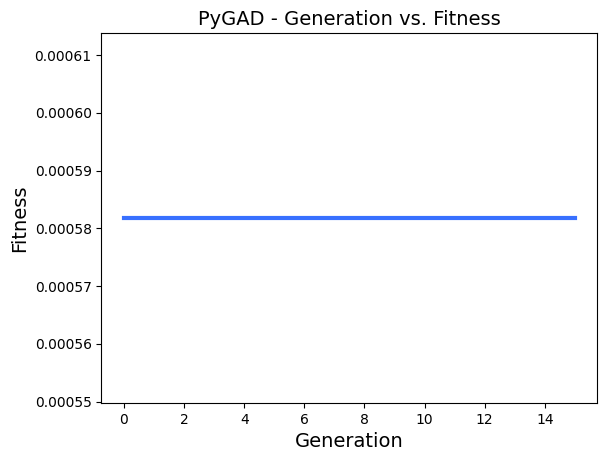

In [13]:
ga_instance.run()
ga_instance.plot_fitness()

In [11]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("x Best Solution: " +str(binatodeci(solution)))
num = binatodeci(solution)
xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
yfs = ((num%16)/16)*10
print("x Best Solution: " +str(xfs)+" y Best Solution: "+str(yfs))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Parameters of the best solution : [0 1 1 1 0 1 0 1]
x Best Solution: 117
x Best Solution: 4.5703125 y Best Solution: 3.125
Fitness value of the best solution = 0.0005600418056515199
Index of the best solution : 0
Predicted output based on the best solution : 5
Best fitness value reached after 0 generations.


In [ ]:
valoresx = range(0,256)
y = [fitness_func(x) for x in valoresx]
print(argrelextrema(np.array(y), np.greater))
num = y.index(max(y))
xfs = ((num/16)/16)*10  #256 -> 12 % 10 -> 2
yfs = ((num%16)/16)*10
print(y.index(max(y)))
print(max(y))
print("x: "+str(xfs)+" y:"+ str(yfs))
fig, ax = plt.subplots(2)
ax[0].plot(valoresx, y, color="red")
a = np.reshape(y,(16,16))
ax[1].imshow(a,cmap='hot', interpolation='nearest')
plt.show()